#  Raw Data Analysis

In [245]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [246]:
from datetime import datetime

output_path = '../data/output/data_'+ datetime.date(datetime.now()).__str__() + '.csv'

# Importing survey data
data_path = '../data/raw/Daten_Messung_210826_Gelenkbus_5430.xlsx'
df1 = pd.read_excel(data_path, index_col=0)
df1['dataset'] = 'August'

data_path = '../data/raw/Daten_Messung_211123_Gelenkbus_5431.xlsx'
df2 = pd.read_excel(data_path, index_col=0)
df2['dataset'] = 'November'

data_path = '../data/raw/Daten_Messung_220330_Gelenkbus_5431.xlsx'
df3 = pd.read_excel(data_path, index_col=0)
df3['dataset'] = 'March'

data_path = '../data/raw/Daten_Messung_220407_Gelenkbus_5430.xlsx'
df4 = pd.read_excel(data_path, index_col=0)
df4['dataset'] = 'April'

data_path = '../data/raw/Daten_Messung_220617_Gelenkbus_5431.xlsx'
df5 = pd.read_excel(data_path, index_col=0)
df5['dataset'] = 'June1'

data_path = '../data/raw/Daten_Messung_220624_Gelenkbus_5429.xlsx'
df6 = pd.read_excel(data_path, index_col=0)
df6['dataset'] = 'June2'

df = pd.concat([df1, df2, df3, df4,df5, df6])
df

,Outside Temperature,Avg. Temperature,Feet temperature,Temperature difference,RH,va,Tg,Gender,Age,Height,...,Thermal comfort (global),Thermal comfort (head),Thermal comfort (hands),Thermal comfort (feet),Position,Window / alley,Duration,Icl,dataset,Activity
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-26 08:52:06.795,15.690,18.560,17.440,2.920,73.440,0.040,17.870,0,23,169.0,...,0,0.0,0.0,0.0,Gelenkbereich,Gang,Weniger als 15 Minuten,1.06280,August,NaN
2021-08-28 08:53:29.827,15.590,19.185,19.220,1.650,74.410,0.155,18.125,1,18,186.0,...,0,0.0,0.0,0.0,Hinterwagen - Tür,Gang,15 to 30 minutes,0.82065,August,NaN
2021-08-26 08:57:16.568,15.690,19.580,18.965,1.745,73.255,0.020,18.905,0,33,160.0,...,0,0.0,0.0,0.0,Hinterwagen - Hinterbereich,Fenster,Less than 15 minutes,0.72045,August,NaN
2021-08-26 08:57:34.979,15.690,19.105,19.030,1.615,73.275,0.240,18.155,0,26,167.0,...,1,1.0,1.0,1.0,Hinterwagen - Tür,Fenster,Weniger als 15 Minuten,0.65365,August,NaN
2021-08-26 08:58:22.123,15.690,19.050,16.810,3.470,77.180,0.240,18.620,0,47,172.0,...,0,0.0,0.0,0.0,Vorderwagen - Vordere Tür,Gang,Weniger als 15 Minuten,0.74550,August,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24 13:56:00.000,33.594,33.665,NaN,1.470,39.900,0.160,35.315,0,27,163.0,...,1,1.0,1.0,1.0,Bereich 6 - Hinterbereich,Fenster,NaN,0.42820,June2,1.0
2022-06-24 13:56:00.000,33.594,33.665,NaN,1.470,39.900,0.160,35.315,0,0,0.0,...,2,2.0,2.0,2.0,Bereich 6 - Hinterbereich,Gang,Between 20 and 30 minutes,0.43655,June2,1.0
2022-06-24 13:59:53.000,33.094,33.989,NaN,1.430,38.460,0.150,35.375,0,18,164.0,...,3,3.0,3.0,3.0,Bereich 6 - Hinterbereich,Gang,NaN,0.45325,June2,1.0


In [247]:
df.columns

Index(['Outside Temperature', 'Avg. Temperature', 'Feet temperature',
       'Temperature difference', 'RH', 'va', 'Tg', 'Gender', 'Age', 'Height',
       'Weight', 'Well-being', 'Thermal feeling (global)',
       'Thermal feeling (head)', 'Thermal feeling (hands)',
       'Thermal feeling (feet)', 'Thermal comfort (global)',
       'Thermal comfort (head)', 'Thermal comfort (hands)',
       'Thermal comfort (feet)', 'Position', 'Window / alley', 'Duration',
       'Icl', 'dataset', 'Activity'],
      dtype='object')

In [248]:
# interesting columns:
interesting_columns = ['Outside Temperature', 'Avg. Temperature',
       'Temperature difference', 'RH', 'va', 'Tg', 'Gender', 'Age', 'Height',
       'Weight', 'Well-being',  'Window / alley', 'Duration',
       'Icl', 'dataset', 'Thermal feeling (global)']

df = df[interesting_columns]


def function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

df['Thermal feeling (global)'] = df['Thermal feeling (global)'].apply(function)

df.rename({'Thermal feeling (global)': 'y'}, axis=1, inplace=True)

/tmp/ipykernel_80513/2943264283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Thermal feeling (global)'] = df['Thermal feeling (global)'].apply(function)
/tmp/ipykernel_80513/2943264283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'Thermal feeling (global)': 'y'}, axis=1, inplace=True)


In [249]:
df['Gender'] = df['Gender'].astype(bool)
df['Male'] = df['Gender']

/tmp/ipykernel_80513/4277541389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].astype(bool)
/tmp/ipykernel_80513/4277541389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male'] = df['Gender']


In [250]:
df['Female'] = ~df['Gender']
df.drop(columns='Gender', inplace=True)

/tmp/ipykernel_80513/991242717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Female'] = ~df['Gender']
/tmp/ipykernel_80513/991242717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Gender', inplace=True)


In [251]:
df['Alley'] = df.replace({'Gang': True, 'Alley': True, 'Window': False, 'Fenster': False})['Window / alley'].astype(bool)
df['Window'] = ~df['Alley']
df.drop(columns='Window / alley', inplace=True)

/tmp/ipykernel_80513/1763419138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alley'] = df.replace({'Gang': True, 'Alley': True, 'Window': False, 'Fenster': False})['Window / alley'].astype(bool)
/tmp/ipykernel_80513/1763419138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Window'] = ~df['Alley']
/tmp/ipykernel_80513/1763419138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [252]:
df[['Male', 'Female', 'Alley', 'Window']] = df[['Male', 'Female', 'Alley', 'Window']].astype(int)

/tmp/ipykernel_80513/2895741257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Male', 'Female', 'Alley', 'Window']] = df[['Male', 'Female', 'Alley', 'Window']].astype(int)


In [253]:
duration_map = {'Weniger als 15 Minuten': 7.5,
 '15 to 30 minutes': 22.5,
 'Less than 15 minutes': 7.5,
 '15 bis 30 Minuten': 22.5,
 '45 Minuten bis 1 Stunde': 52.5,
 'Länger als 1 Stunde': 60,
 '30 bis 45 Minuten': 37.5,
 'Between 0 and 10 minutes': 5,
 'Between 0 and 15 minutes': 7.5,
 'Between 0 and 20 minutes': 10,
 'Between 0 and 25 minutes': 12.5,
 'Between 10 and 25 minutes': 17.5,
 'Between 10 and 30 minutes': 20,
 'Between 0 and 5 minutes': 2.5,
 'Between 10 and 15 minutes': 12.5,
 'Between 15 and 20 minutes':17.5,
 'Between 10 and 20 minutes':15,
 'Between 20 and 35 minutes':27.5,
 'Between 15 and 30 minutes': 22.5,
 'Between 30 and 45 minutes': 37.5,
 'Between 15 and 25 minutes': 20,
 'Between 30 and 35 minutes': 32.5,
 'Between 30 and 40 minutes': 35,
                 'Between 20 and 30 minutes': 22.5,
                }

df['Duration'] = df['Duration'].replace(duration_map).astype(float)

/tmp/ipykernel_80513/3179138798.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = df['Duration'].replace(duration_map).astype(float)


In [254]:
df.describe()

,Outside Temperature,Avg. Temperature,Temperature difference,RH,va,Tg,Age,Height,Weight,Well-being,Duration,Icl,y,Male,Female,Alley,Window
count,496.000000,496.000000,496.000000,496.000000,465.000000,496.000000,496.000000,493.000000,491.000000,493.000000,456.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,17.988401,22.411796,1.957008,55.143256,0.096355,22.275444,36.848790,169.200811,69.596741,0.841785,11.101974,0.782587,0.272177,0.435484,0.564516,0.417339,0.582661
std,8.035173,5.974685,1.296895,12.476867,0.091405,6.234257,17.396717,23.032988,19.750492,0.785617,9.143545,0.324780,0.784002,0.496321,0.496321,0.493618,0.493618
min,5.200000,10.640000,0.300000,25.380000,0.000000,9.810000,0.000000,0.000000,0.000000,-2.000000,2.500000,0.261200,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.800000,18.653750,1.070000,44.882500,0.030000,18.355000,24.000000,165.000000,60.000000,0.000000,5.000000,0.461600,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.600000,22.262500,1.632500,53.770000,0.070000,22.155000,33.500000,170.000000,68.000000,1.000000,7.500000,0.753850,0.000000,0.000000,1.000000,0.000000,1.000000
75%,24.000000,27.130000,2.546250,63.882500,0.140000,27.160000,47.000000,180.000000,80.000000,1.000000,13.125000,1.054450,1.000000,1.000000,1.000000,1.000000,1.000000
max,33.594000,33.989000,7.830000,86.160000,0.705000,35.375000,87.000000,200.000000,160.000000,2.000000,60.000000,1.847700,1.000000,1.000000,1.000000,1.000000,1.000000


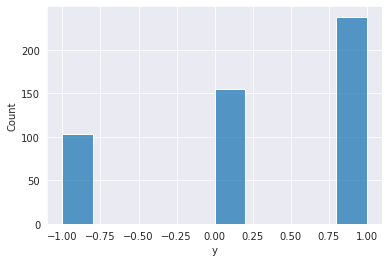

In [255]:
sns.histplot(df['y'])
plt.show()

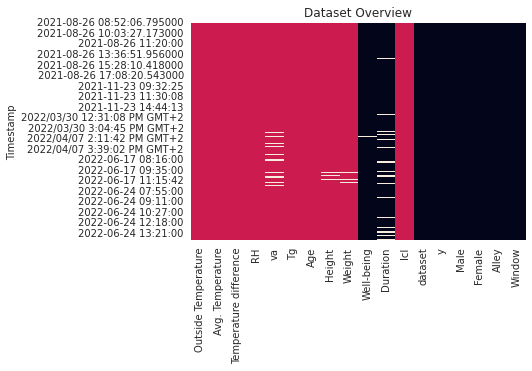

In [256]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

In [257]:
df.reset_index(inplace=True,drop=True)

<AxesSubplot:>

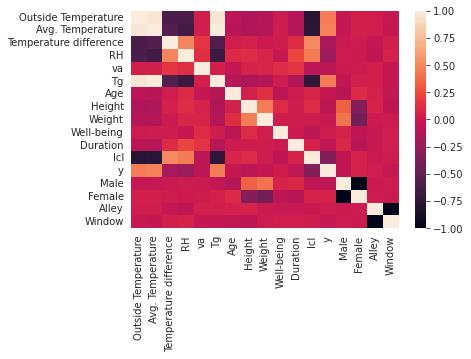

In [258]:
sns.heatmap(df.corr())

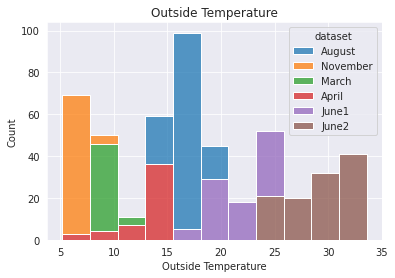

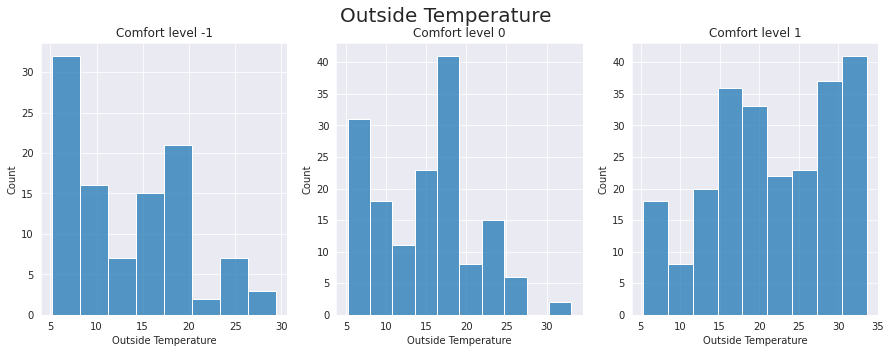

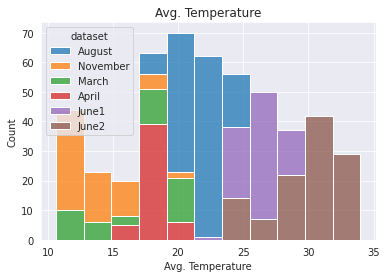

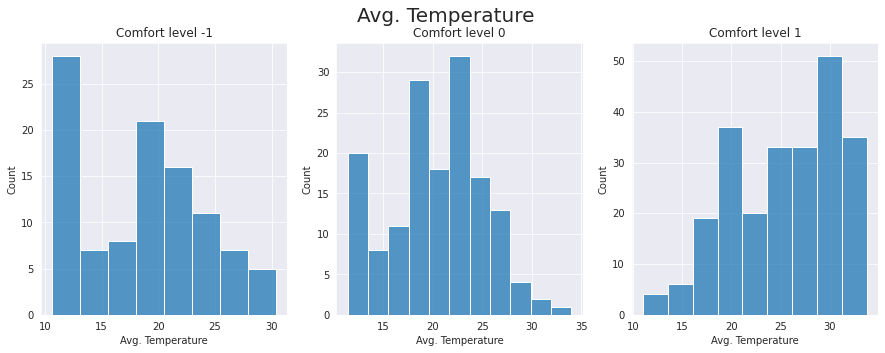

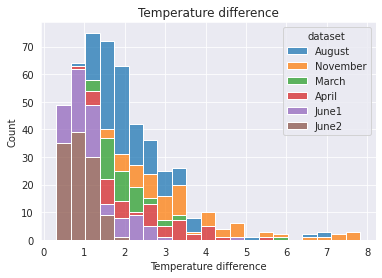

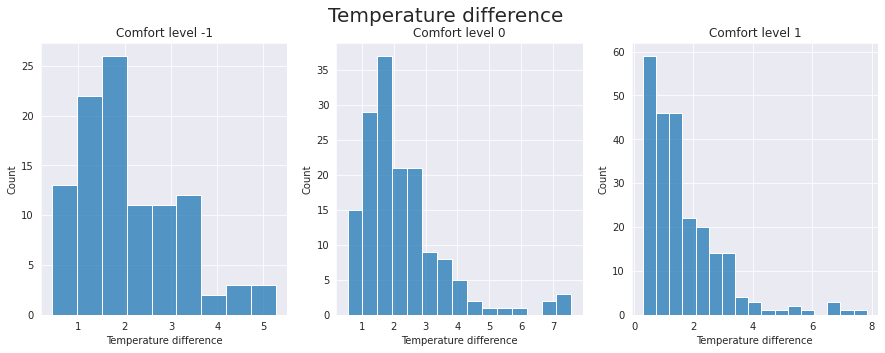

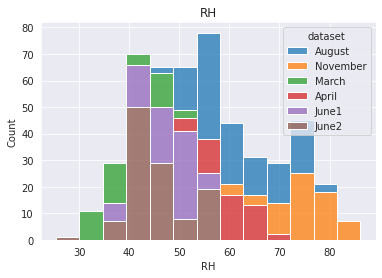

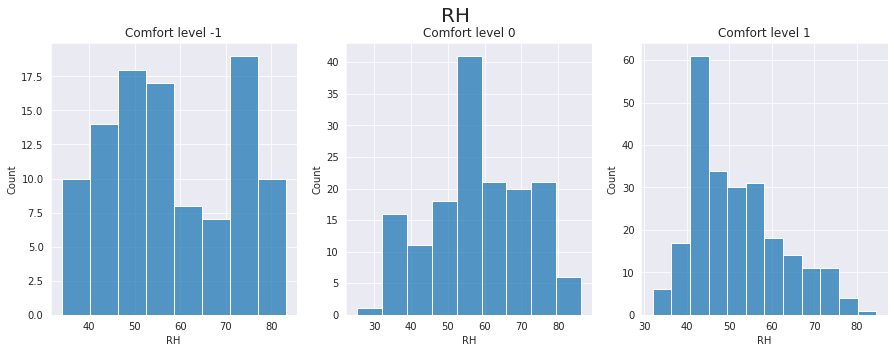

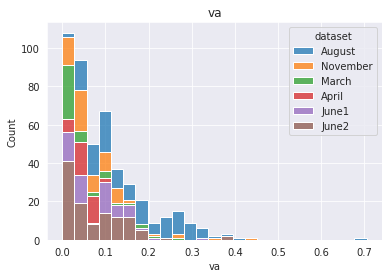

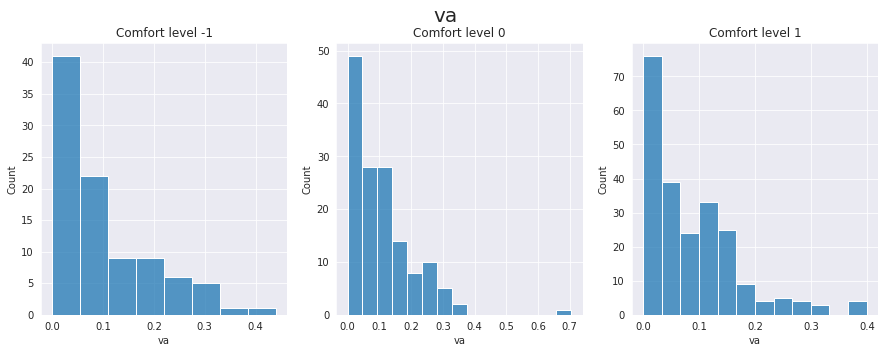

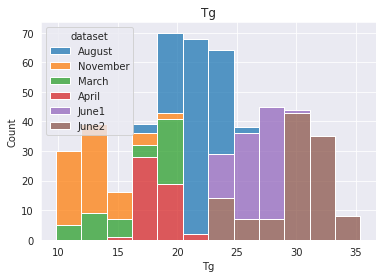

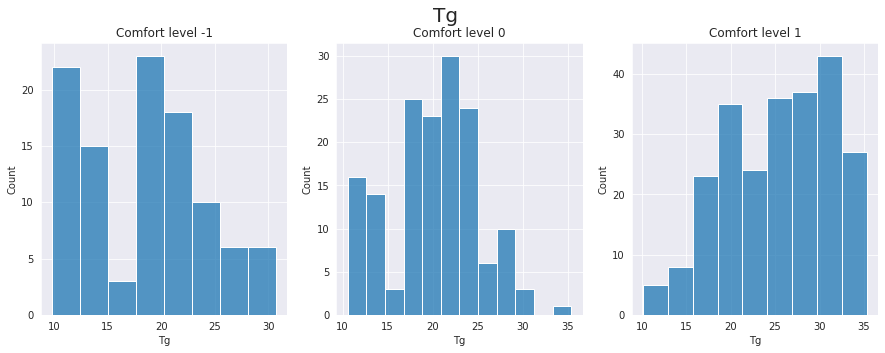

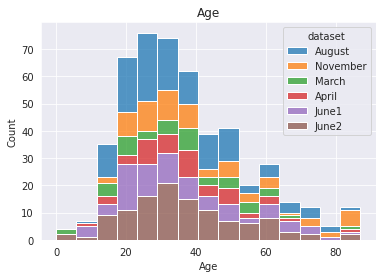

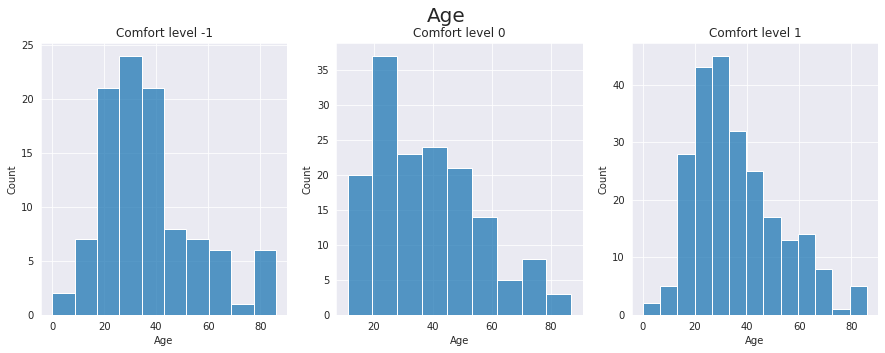

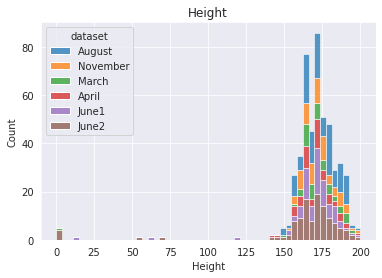

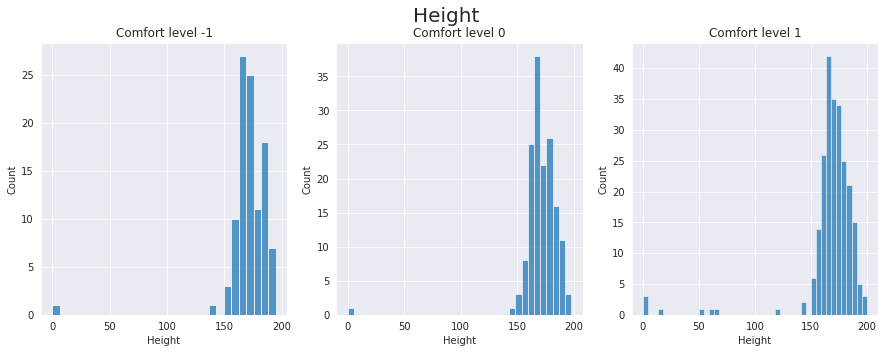

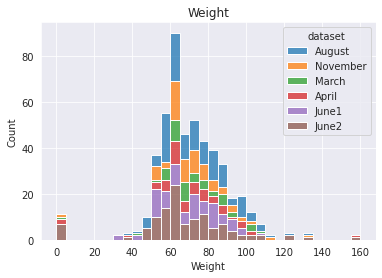

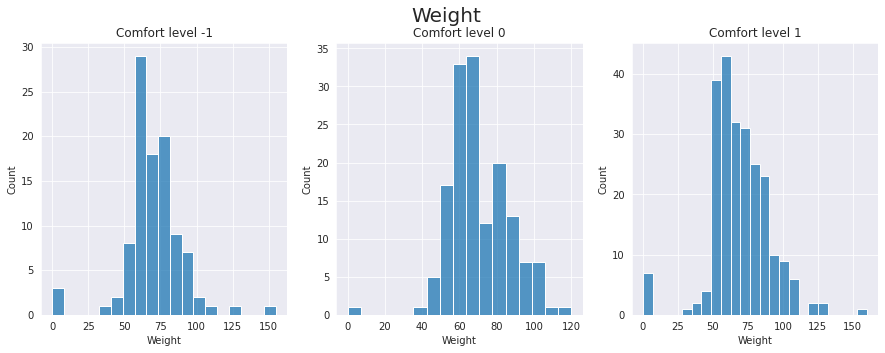

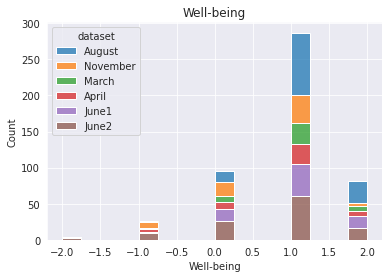

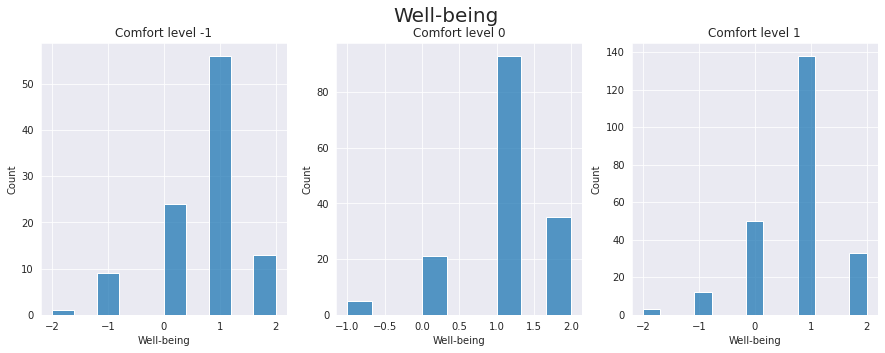

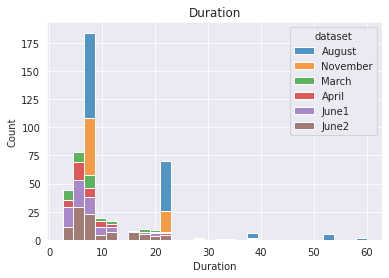

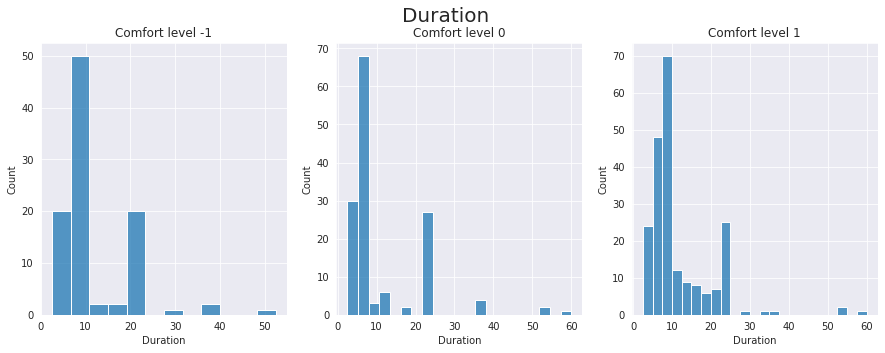

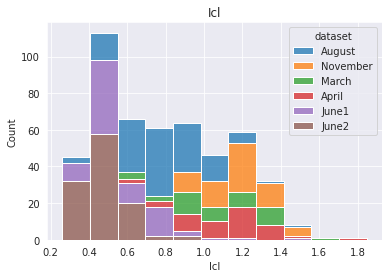

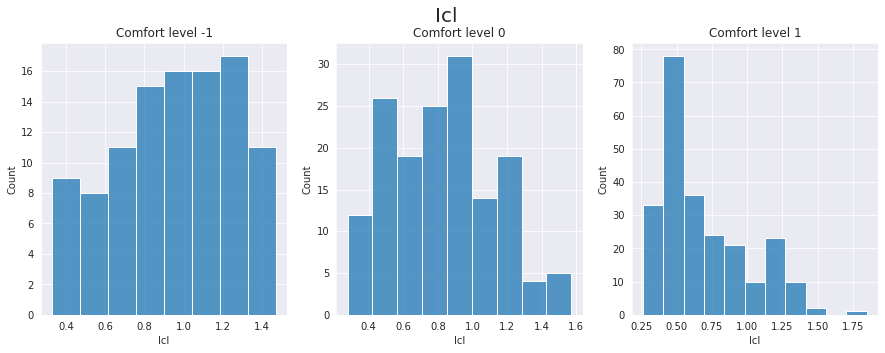

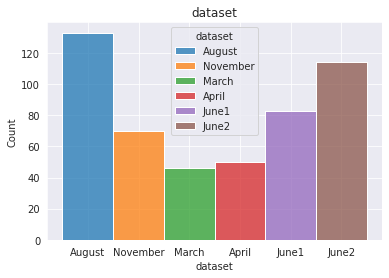

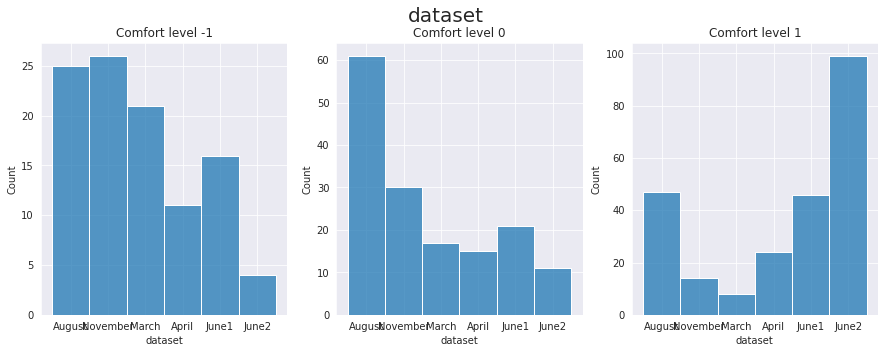

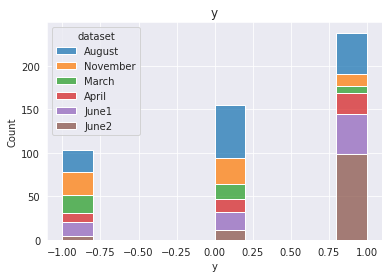

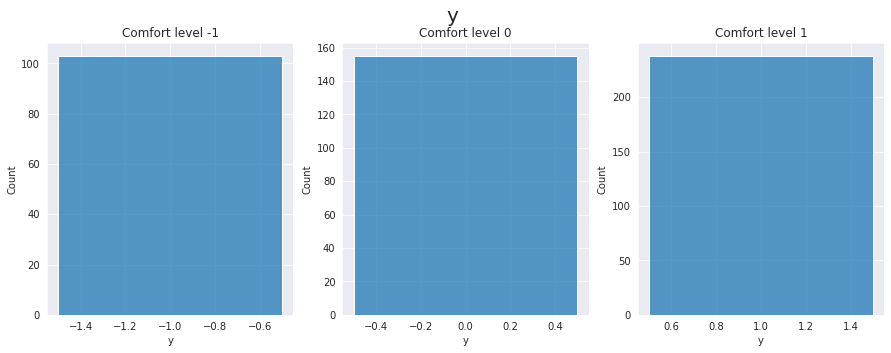

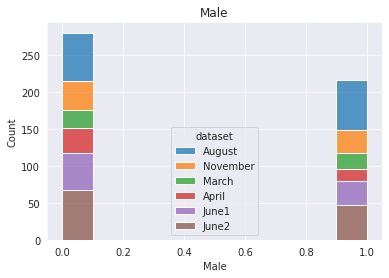

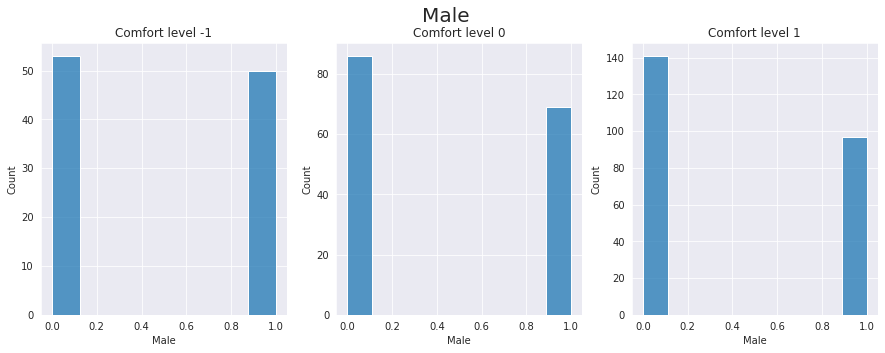

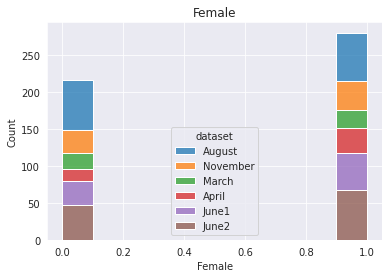

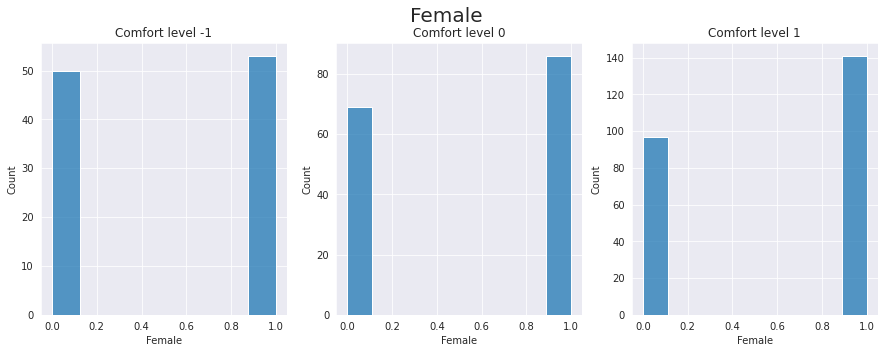

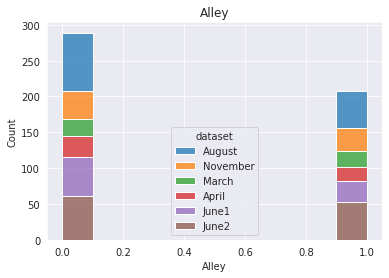

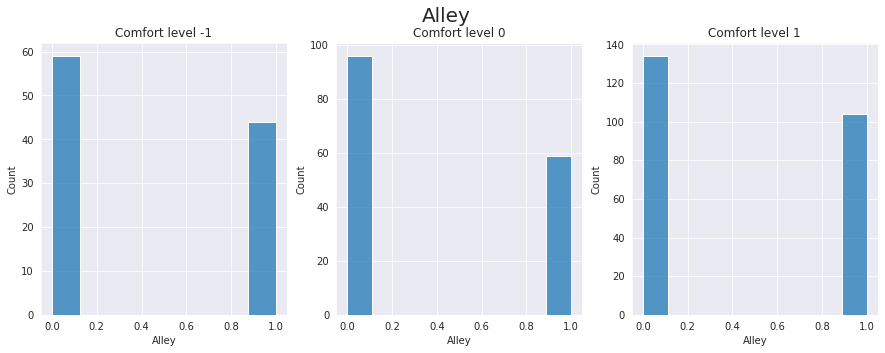

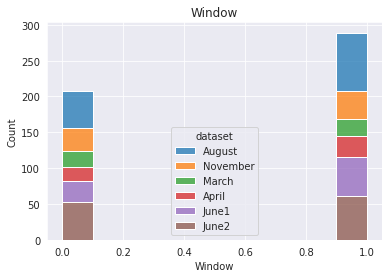

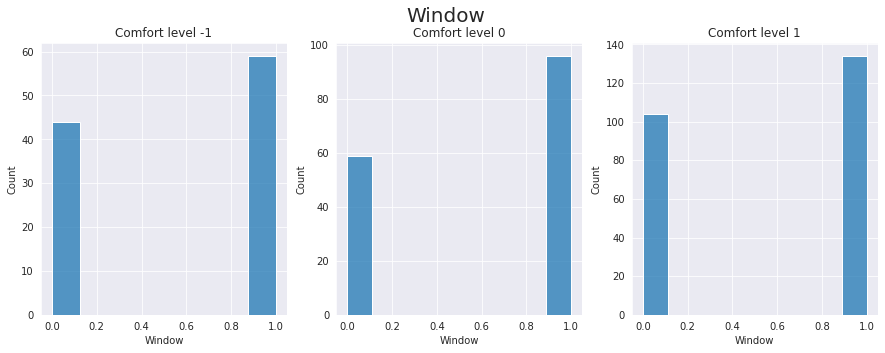

In [259]:
for col in df.columns:
    plt.title(col)
    sns.histplot(data=df , x=col, hue='dataset', multiple="stack")
    plt.show()

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle(f'{col}', fontsize=20)
    for i in [-1,0,1]:
        ax[i+1].set_title(f'Comfort level {i}')
        sns.histplot(data=df[df['y']==i] , x=col, ax=ax[i + 1])#, hue='dataset', multiple="stack")
    plt.show()


# Dealing with missing values

In [260]:
df['Height'][df['Height'] == 0] = np.nan
df['Weight'][df['Weight'] == 0] = np.nan

/tmp/ipykernel_80513/2014783462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'][df['Height'] == 0] = np.nan
/tmp/ipykernel_80513/2014783462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'][df['Weight'] == 0] = np.nan


In [261]:
df['va'] = df['va'].fillna(df['va'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Well-being'] = df['Well-being'].fillna(df['Well-being'].mean())
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())

/tmp/ipykernel_80513/2591920078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['va'] = df['va'].fillna(df['va'].mean())
/tmp/ipykernel_80513/2591920078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].fillna(df['Height'].mean())
/tmp/ipykernel_80513/2591920078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [262]:
df = df[[ 'dataset','Outside Temperature', 'Avg. Temperature', 'Temperature difference',
       'RH', 'va', 'Tg', 'Age', 'Male', 'Female','Height', 'Weight', 'Well-being', 'Duration',
       'Icl',  'Alley', 'Window', 'y']]

In [263]:
df = df[df['y'] != -1]

In [264]:
df.to_csv(output_path, index= False)